In [1]:
from google.colab import drive  
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
# 결측값 확인 패키지
import missingno as msno
import numpy as np

In [3]:
PATH='/content/gdrive/MyDrive/개인 공부/dacon/dacon_energy/dacon_energy'

In [4]:
train = pd.read_csv(PATH + '/train.csv', encoding='cp949', header=0)
mis_test = pd.read_csv(PATH + '/test.csv', encoding='cp949', header=0)

In [5]:
train.columns = ['num','datetime','power(kWh)','tempe(°C)','wind(m/s)','hum(%)','rain(mm)','sol(hr)','ne_cool','sol_energy']
mis_test.columns = ['num','datetime','tempe(°C)','wind(m/s)','hum(%)','rain(mm)','sol(hr)','ne_cool','sol_energy']

In [6]:
sub = pd.read_csv('/content/gdrive/MyDrive/개인 공부/dacon/dacon_energy/sub data/RNN_baseline_submission2.csv')

In [7]:
sub_num = [] 
for i in range(len(sub)):
  num_datetime = np.array(sub['num_date_time'])
  sub_num.append(int(num_datetime[i].split(" ")[0]))
sub['num'] = sub_num
sub

,num_date_time,answer,num
0,1 2020-08-25 00,8715.835961,1
1,1 2020-08-25 01,8655.304575,1
2,1 2020-08-25 02,8648.429400,1
3,1 2020-08-25 03,8671.354189,1
4,1 2020-08-25 04,8644.343953,1
...,...,...,...
10075,60 2020-08-31 19,3603.450121,60
10076,60 2020-08-31 20,3544.640642,60
10077,60 2020-08-31 21,3498.005202,60
10078,60 2020-08-31 22,3443.269121,60


In [8]:
train

,num,datetime,power(kWh),tempe(°C),wind(m/s),hum(%),rain(mm),sol(hr),ne_cool,sol_energy
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [9]:
train_plt = train[['num','datetime','power(kWh)']]
sub_plt = sub[['num','num_date_time','answer']]

In [10]:
import matplotlib.pyplot as plt
for i in range(1,61):
  df1 = train_plt[train_plt['num']==i][['datetime','power(kWh)']]
  print(len(df1))
  df2 = sub_plt[sub_plt['num']==i][['num_date_time','answer']]
  print(len(df2))
  rslt = pd.concat([df1, df2], axis = 0)
  rslt = rslt.reset_index(drop=True).drop(['datetime','num_date_time'], axis = 1)
  print(len(rslt))
  plt.plot(rslt)
  plt.axvline(x=2040, color = 'red')
  plt.title("number : {}".format(i))
  plt.legend(['y_train','y_pred'],
            loc='upper left')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

2040
168
2208


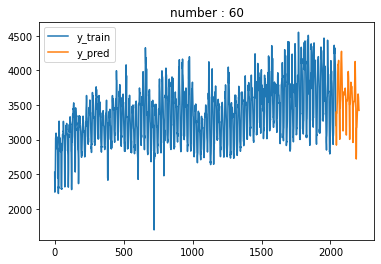

2040
168
2208


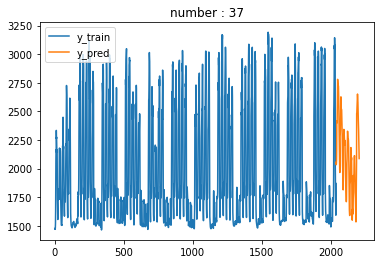

2040
168
2208


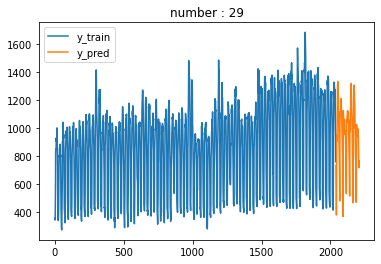

In [11]:
import matplotlib.pyplot as plt
for i in [60, 37,29]:
  df1 = train_plt[train_plt['num']==i][['datetime','power(kWh)']]
  print(len(df1))
  df2 = sub_plt[sub_plt['num']==i][['num_date_time','answer']]
  print(len(df2))
  rslt = pd.concat([df1, df2], axis = 0)
  rslt = rslt.reset_index(drop=True).drop(['datetime','num_date_time'], axis = 1)
  print(len(rslt))
  plt.plot(rslt)
  # plt.axvline(x=2040, color = 'red')
  plt.title("number : {}".format(i))
  plt.legend(['y_train','y_pred'],
            loc='upper left')
  plt.show()

In [12]:
df1 = train_plt[train_plt['num']==29][['datetime','power(kWh)']]
df2 = sub_plt[sub_plt['num']==29][['num_date_time','answer']]
rslt = pd.concat([df1, df2], axis = 0)
rslt = rslt.reset_index(drop=True).drop(['datetime','num_date_time'], axis = 1)
rslt

,power(kWh),answer
0,357.210,NaN
1,348.948,NaN
2,352.674,NaN
3,347.004,NaN
4,381.834,NaN
...,...,...
2203,NaN,840.397335
2204,NaN,764.260424
2205,NaN,743.032170
2206,NaN,719.359019


In [20]:
# train_plt[train_plt['num']==29].to_excel("/content/gdrive/MyDrive/개인 공부/dacon/dacon_energy/29번 사업장 data.xlsx")

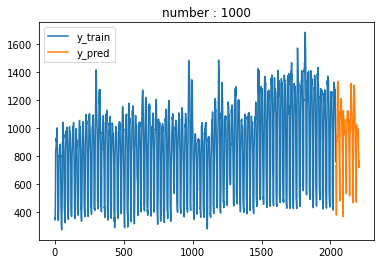

In [ ]:
plt.plot(rslt)
# plt.axvline(x=2040, color = 'red')
plt.title("number : {}".format(i))
plt.legend(['y_train','y_pred'],
            loc='upper left')
plt.show()

In [ ]:
from matplotlib import animation

In [ ]:
train_plt

,num,datetime,power(kWh)
0,1,2020-06-01 00,8179.056
1,1,2020-06-01 01,8135.640
2,1,2020-06-01 02,8107.128
3,1,2020-06-01 03,8048.808
4,1,2020-06-01 04,8043.624
...,...,...,...
122395,60,2020-08-24 19,4114.368
122396,60,2020-08-24 20,3975.696
122397,60,2020-08-24 21,3572.208
122398,60,2020-08-24 22,3299.184


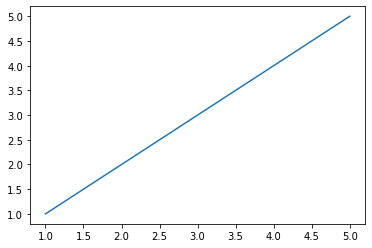

In [ ]:
# data=pd.read_csv(r"C:\Users\Adnan\Desktop\OldFaithful.csv")
count=3
x=[1,2,3,4,5]
y=[1,2,3,4,5]
from matplotlib import animation
def draw_graph(i):
    global count
    count +=1
    x.append(count)
    y.append(x[count])
    
plt.cla()
plt.plot(x,y)
    
anima= animation.FuncAnimation(plt.gcf(),draw_graph,interval=1500)
plt.show()